# Kpetene-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'KPT'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [27]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%KPT%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != ''))""".replace('\n',' ')
# Anzahl != damit das in Kpetene fotografierte Gefäß nicht mit dabei ist

df = pd.read_sql(sql, con)
display(df.head())

,objID,ort_kurz,Ort,bef_nr,ort_fluss,GE,Scherbe,Gewicht,Anzahl,Typ
0,39,BLN,Balongoi (Fpl. 214),85/101,Ubangi,,W,581,1,KPT/MTB
1,185,KPT,Kpetene (Fpl. 220),85/101,Ubangi,1,W,855,1,KPT
2,5464,KOU,Kouango (Fpl. 229),85/101,Ubangi,,R,87,1,KPT
3,5465,KOU,Kouango (Fpl. 229),85/101,Ubangi,,W,71,1,KPT (?)
4,5519,GBA,Gbandami (Fpl. 226),85/101,Ubangi,,R,46,1,KPT


In [28]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)

Typ
KPT        3.0
KPT (?)    4.0
KPT/MTB    1.0
All        8.0
Name: objID, dtype: float64

In [29]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl  Gewicht
ort_fluss Ort                 bef_nr                 
Ubangi    Balongoi (Fpl. 214) 85/101       1      581
          Boduna (Fpl. 225)   85/101       3      242
          Gbandami (Fpl. 226) 85/101       1       46
          Kouango (Fpl. 229)  85/101       2      158
          Kpetene (Fpl. 220)  85/101       1      855

In [30]:
len(df_pivot.index)

5

In [31]:
np.sum(df_pivot['Anzahl'])

8

In [32]:
np.sum(df_pivot['Gewicht'])

1882

## Technologische Merkmale (*fabrics*)

In [33]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%KPT%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [34]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [35]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
6a,2,25.0
4a,1,12.5
5a,1,12.5
6b,1,12.5
7c,1,12.5


In [36]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,NaN,NaN
wenig,NaN,NaN
mittel,2.0,28.571429
viel,3.0,42.857143
sehr viel,2.0,28.571429


In [37]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,NaN,NaN
F,1.0,14.285714
M,1.0,14.285714
C,3.0,42.857143
VC,2.0,28.571429


In [38]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S/Gl,2,28.571429
Gl,1,14.285714
S/Gl/Org,1,14.285714
S/Gl/Schamott/Schlacke?,1,14.285714
S/Laterit/Schamott (?),1,14.285714
S/Org,1,14.285714


### Brennfarbe

In [39]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%KPT%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,4,50.0
Sonstig,3,37.5
Weiß,1,12.5


In [40]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

### Oberfläche der Scherben

In [41]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%KPT%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
außen glatt/innen rau,1,14.285714
glatt,4,57.142857
leicht rau,1,14.285714
rau,1,14.285714


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


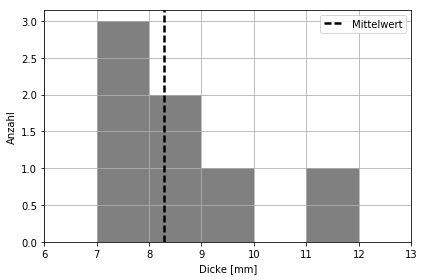

In [42]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%KPT%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

In [43]:
df['Wandung'].describe()

count     7.000000
mean      8.285714
std       1.799471
min       7.000000
25%       7.000000
50%       8.000000
75%       8.500000
max      12.000000
Name: Wandung, dtype: float64

In [44]:
df['Wandung'].var()

3.2380952380952377

### Scherbentypen

In [45]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Scherbe,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%KPT%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_obj.Anzahl) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())
df

,objID,Scherbe,Anzahl
0,39,W,1
1,185,W,1
2,5464,R,1
3,5465,W,1
4,5519,R,1
5,5940,W,1
6,5942,R,1
7,5949,W,1


In [46]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot

Scherbe
R    3
W    5
Name: Anzahl, dtype: int64

In [47]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,NaN,NaN
R,3.0,37.5
W,5.0,62.5
B,NaN,NaN


In [48]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Gefäßformen

In [49]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%KPT%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [50]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [51]:
df_pivot['objID'].sum()

6

In [52]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,3,50.0
sicher,3,50.0


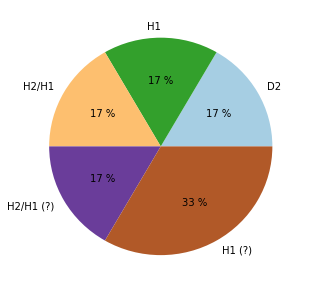

In [53]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

## Bauchform

In [54]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%KPT%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [55]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,7,87.5
A1 (?),1,12.5


## Mündungs- und Randformen

In [56]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%KPT%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [57]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M4/M6,2,40.0
M6,2,40.0
M3,1,20.0


In [58]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

3

In [59]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
C3,4,66.666667
B1 (?),1,16.666667
C1,1,16.666667


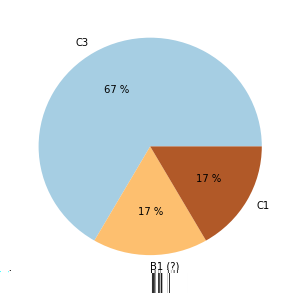

In [60]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

## Bodenformen

In [61]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%KPT%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden
0,KPT,Kpetene,185,KPT,H1,B1/B3


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


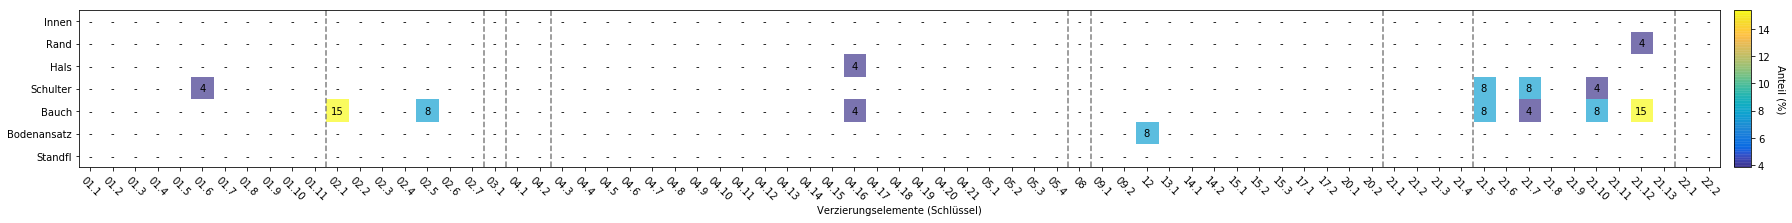

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-8_Kpetene_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [64]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzName_alt,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%KPT%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [65]:
df.loc[df['verzName'].str.contains("20.1")]

,objID,posID,verzID,pos,verzName,verzName_alt,verzBeschr,Typ,Form_Gef


In [66]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

In [67]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

In [68]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


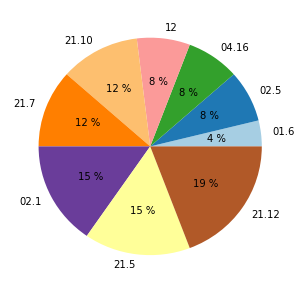

In [69]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')
#plt.title('Mokelo-Gruppe\nGefäßformen')
#plt.savefig('output/3-1-1-3_Mokelo-Gr_GefForm2.pdf')

In [70]:
a = pd.Series({'Roulette-Verzierung':len(df.loc[df['verzName'].str.contains("21.")].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains("21.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Roulette-Verzierung,15,57.692308
Weitere Verzierungen,11,42.307692


In [71]:
# nur Roulette-Verzierungen herausfiltern
b = df.loc[df['verzName'].str.contains("21.")]

c = pd.Series({'vegetabilisches Roulette':len(b.loc[df['verzName_alt'].str.contains("V08a")].index),
               'Schnitz-Roulette':len(b.loc[~df['verzName_alt'].str.contains("V08a")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
Schnitz-Roulette,15,100.0
vegetabilisches Roulette,0,0.0


## Verbreitung

In [72]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
0,Balongoi (Fpl. 214),214,18.644374,4.129969,KPT (?)
2,Kpetene (Fpl. 220),220,19.071738,4.899383,KPT
1,Boduna (Fpl. 225),225,19.741706,5.108300,KPT (?)
0,Gbandami (Fpl. 226),226,19.815534,5.111067,KPT
1,Kouango (Fpl. 229),229,19.976358,4.990322,KPT


In [73]:
df.to_csv("../data/processed/3-1-1-8_KPT_Verbreitung.csv", index = False)

## Tafeln

In [74]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,22,1,KPT,85/101,NaN,10,KPT,H1,C3,B1/B3
